Dengue Unleashed: Tracing the Outbreaks and Patterns of Dengue Cases in the Philippines (2016-2020)


# **Dengue Unleashed: Tracing the Outbreaks and Patterns of Dengue Cases in the Philippines (2016-2020)**

In [72]:
#===== Import Modules =====

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns


In [73]:
#===== Import The Csv File =====

url = 'https://raw.githubusercontent.com/dambear/ITBA3203-PROJECT/main/Dataset/ph_dengue_cases2016-2020.csv'
data = pd.read_csv(url)



Display Raw Data CSV File

In [74]:
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


Convert the data into years

In [75]:
df_perYear = data.groupby('Year').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()

df_perYear

,Year,Dengue_Cases,Dengue_Deaths
0,2016,209544,8127
1,2017,154155,4563
2,2018,250783,1226
3,2019,441902,1733
4,2020,91041,1195


Convert the data into years

In [76]:
df_perRegion = data.groupby('Region').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()

df_perRegion 

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


Display LineChart Dengue Case per Year

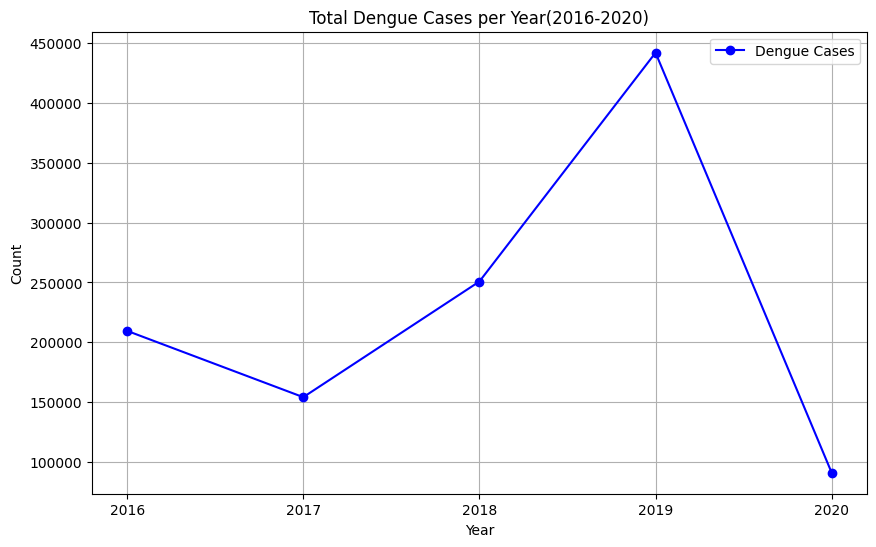

In [77]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_perYear['Year'], df_perYear['Dengue_Cases'], marker='o', label='Dengue Cases', color='blue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Dengue Cases per Year(2016-2020)')
plt.legend()
plt.grid(True)

plt.xticks(df_perYear['Year'], df_perYear['Year'].astype(int))
plt.show()


Display LineChart Dengue Deaths per Year

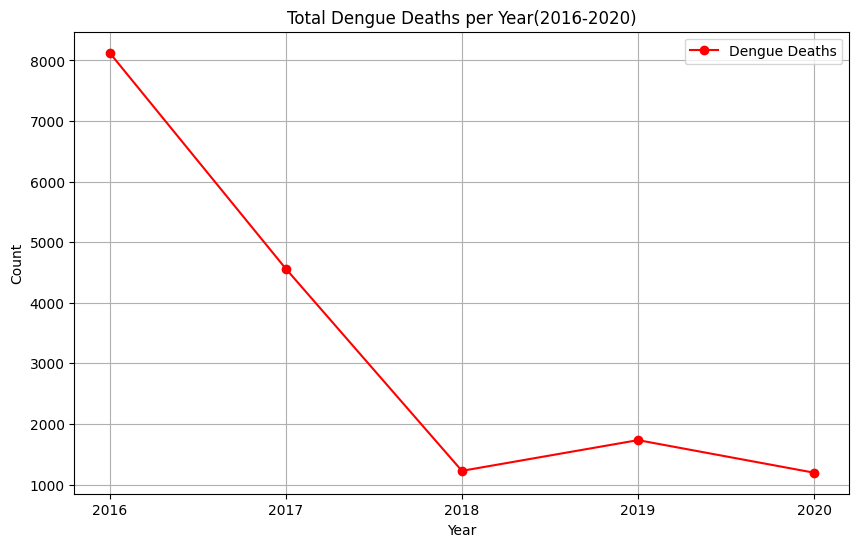

In [78]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_perYear['Year'], df_perYear['Dengue_Deaths'], marker='o', label='Dengue Deaths', color='red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Dengue Deaths per Year(2016-2020)')
plt.legend()
plt.grid(True)

plt.xticks(df_perYear['Year'], df_perYear['Year'].astype(int))
plt.show()


Display Heat Map Dengue Cases

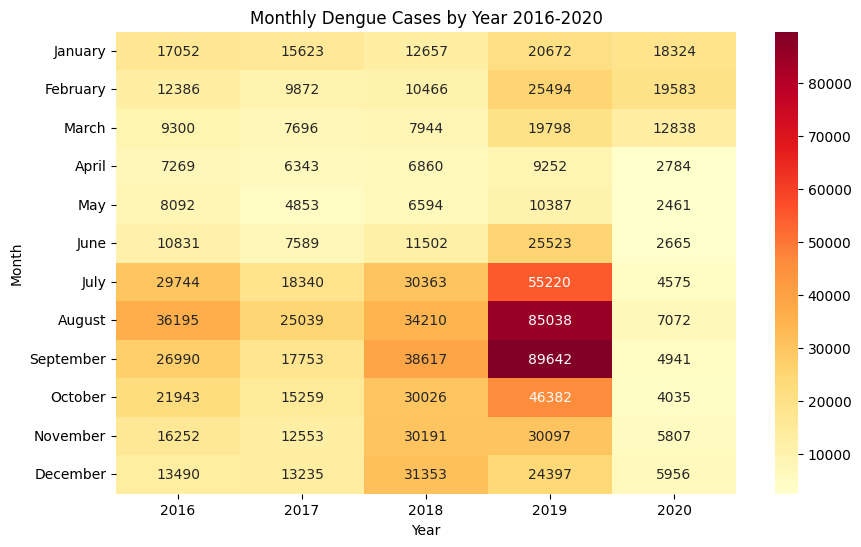

In [79]:
# Define the custom month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

# Pivot the data to create a matrix of monthly dengue cases by year
pivot_table = data.pivot_table(values='Dengue_Cases', index='Month', columns='Year', aggfunc='sum')
pivot_table = pivot_table.reindex(month_order)  # Reorder the rows based on the custom month order

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g', cbar=True)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Dengue Cases by Year 2016-2020')

# Show the plot
plt.show()

Display Heat map dengue deaths

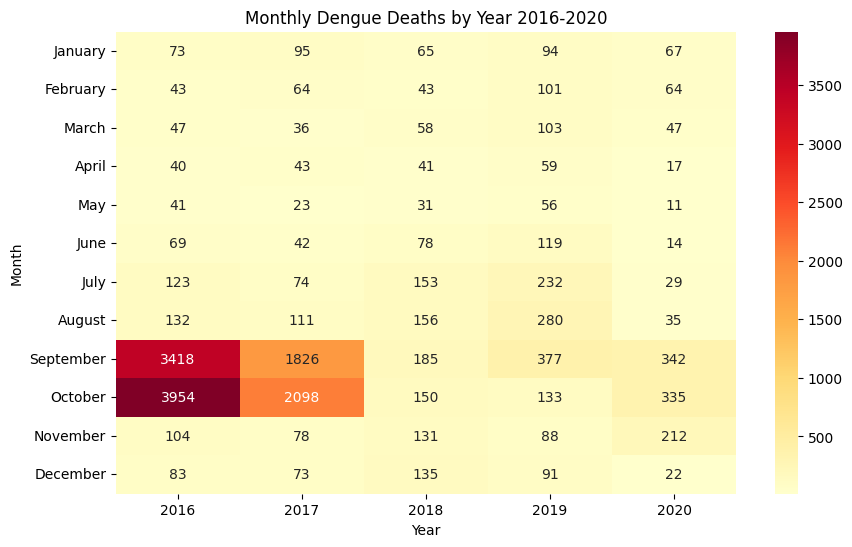

In [80]:
# Define the custom month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

# Pivot the data to create a matrix of monthly dengue cases by year
pivot_table = data.pivot_table(values='Dengue_Deaths', index='Month', columns='Year', aggfunc='sum')
pivot_table = pivot_table.reindex(month_order)  # Reorder the rows based on the custom month order

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g', cbar=True)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Dengue Deaths by Year 2016-2020')

# Show the plot
plt.show()

Display BarChart Total Dengue Case per Region

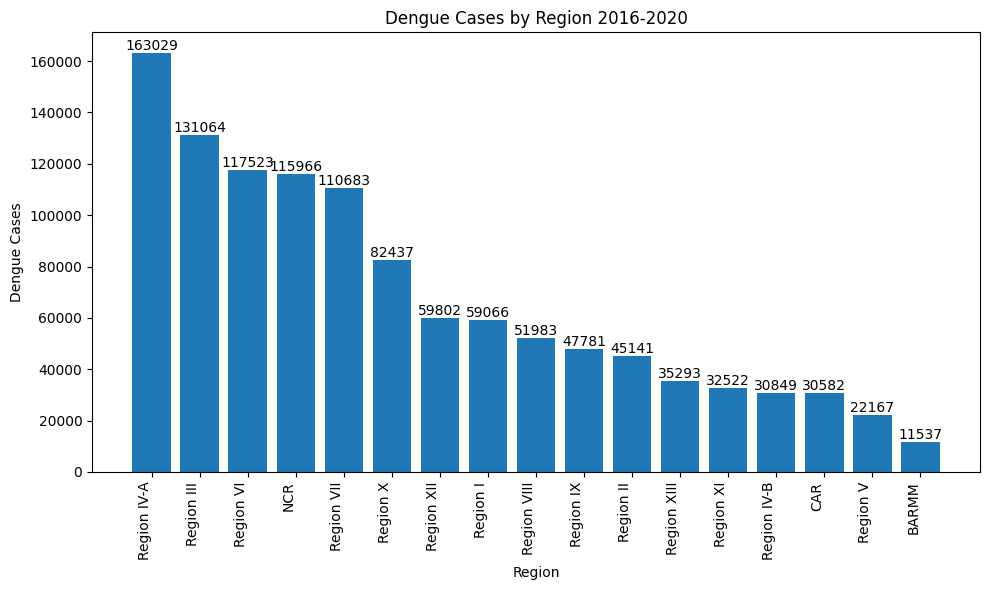

In [81]:
# Sort the data by dengue cases in descending order
df_perRegion.sort_values('Dengue_Cases', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_perRegion['Region'], df_perRegion['Dengue_Cases'], color='tab:blue')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.title('Dengue Cases by Region 2016-2020')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

Display BarChart Total Dengue Deaths per Region

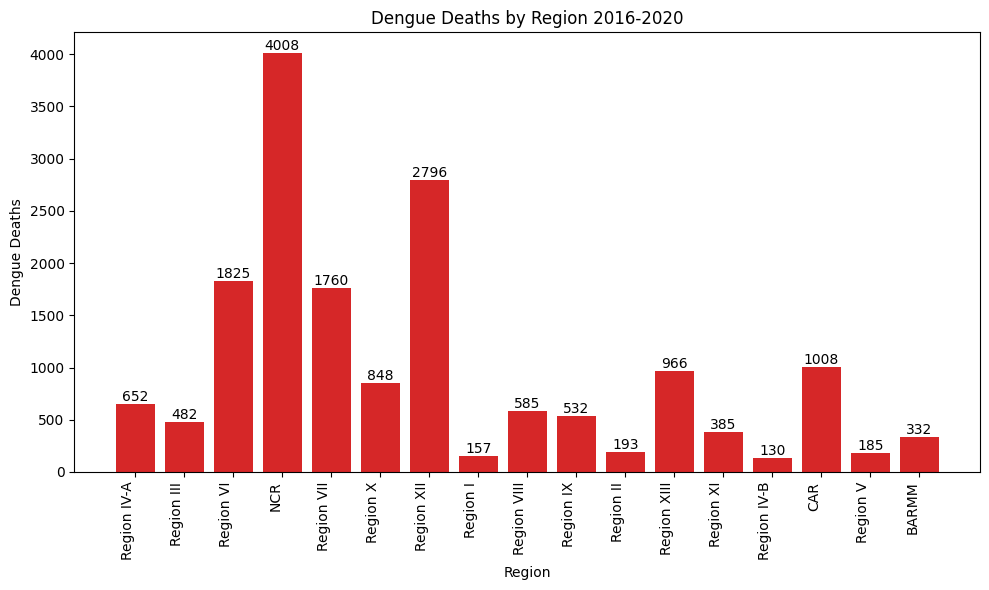

In [85]:
# Sort the data by dengue cases in descending order
df_perRegion.sort_values('Dengue_Cases', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_perRegion['Region'], df_perRegion['Dengue_Deaths'], color='tab:red')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.title('Dengue Deaths by Region 2016-2020')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

Display Pie Chart Dengue Cases Percentage per Region

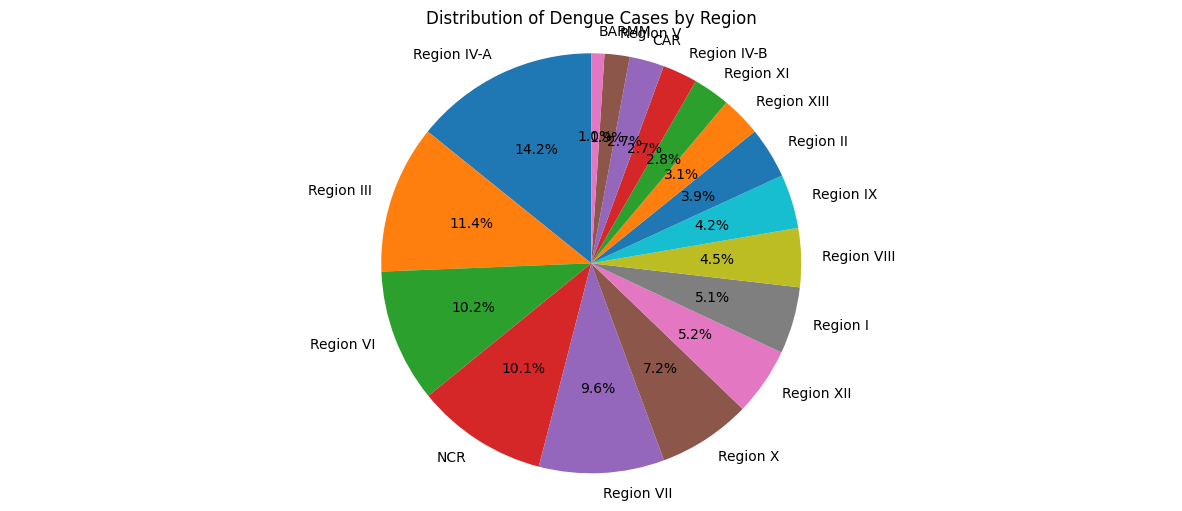

In [86]:
# Create the pie chart
plt.figure(figsize=(15, 6))
plt.pie(df_perRegion['Dengue_Cases'], labels=df_perRegion['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dengue Cases by Region')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

Display Pie Chart Dengue Deaths Percentage per Region

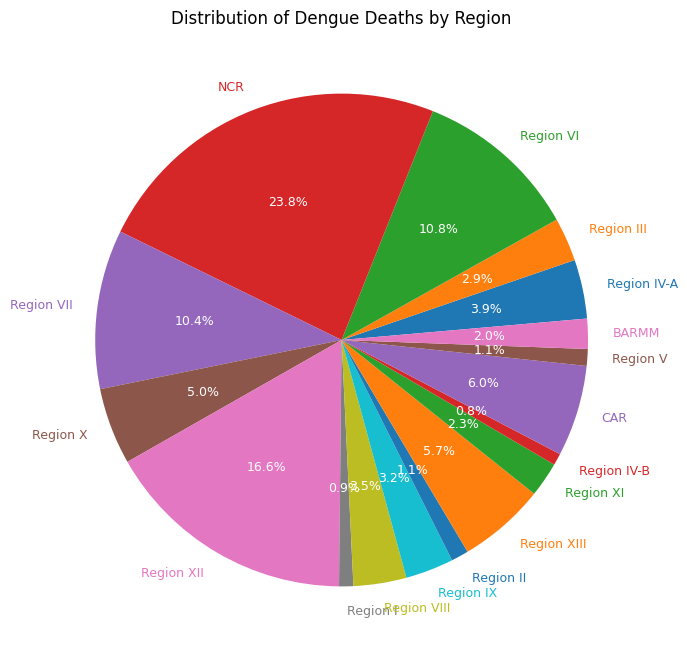

In [82]:
plt.figure(figsize=(8, 8))

# Create a pie chart
patches, texts, autotexts = plt.pie(df_perRegion['Dengue_Deaths'], labels=df_perRegion['Region'], autopct='%1.1f%%', textprops={'fontsize': 9}, startangle=5)

# Set the chart title
plt.title('Distribution of Dengue Deaths by Region')

# Color the text labels based on the color of their corresponding pie slices
for text, autotext, patch in zip(texts, autotexts, patches):
    text.set_color(patch.get_facecolor())
    autotext.set_color('white')

# Show the chart
plt.show()

The Box Represent the whole dengue cases in philippines 2016-2020

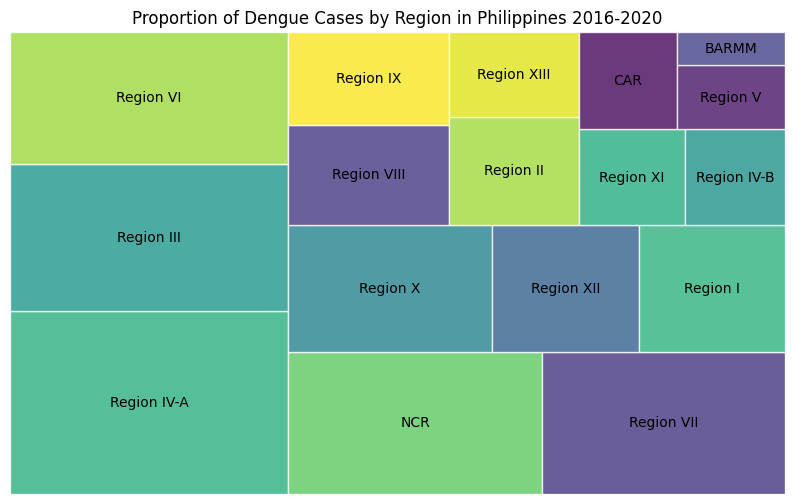

In [83]:
# Calculate the proportion of dengue cases for each region
df_perRegion['Proportion'] = df_perRegion['Dengue_Cases'] / df_perRegion['Dengue_Cases'].sum()

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=df_perRegion['Proportion'], label=df_perRegion['Region'], alpha=0.8, edgecolor='white')

# Set the title
plt.title('Proportion of Dengue Cases by Region in Philippines 2016-2020')

# Remove axis labels
plt.axis('off')

# Show the treemap
plt.show()

The Box Represent the whole dengue deaths in philippines 2016-2020

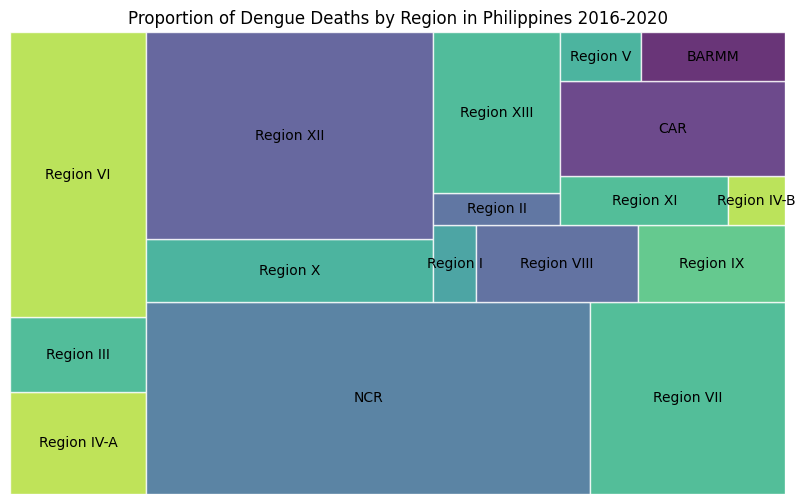

In [84]:
# Calculate the proportion of dengue cases for each region
df_perRegion['Proportion'] = df_perRegion['Dengue_Deaths'] / df_perRegion['Dengue_Deaths'].sum()

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=df_perRegion['Proportion'], label=df_perRegion['Region'], alpha=0.8, edgecolor='white')

# Set the title
plt.title('Proportion of Dengue Deaths by Region in Philippines 2016-2020')

# Remove axis labels
plt.axis('off')

# Show the treemap
plt.show()